# Chapter 3 - Deep learning in digital pathology

* Stain normalization (using code from [G. Schau and M. Tukiainen](https://github.com/schaugf/HEnorm_python))
* Data augmentation with basic transformations
* Data augmentation with colour augmentation

In [5]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.transform import resize

from stain import rgb2hec, hec2norm, hec2unmixed

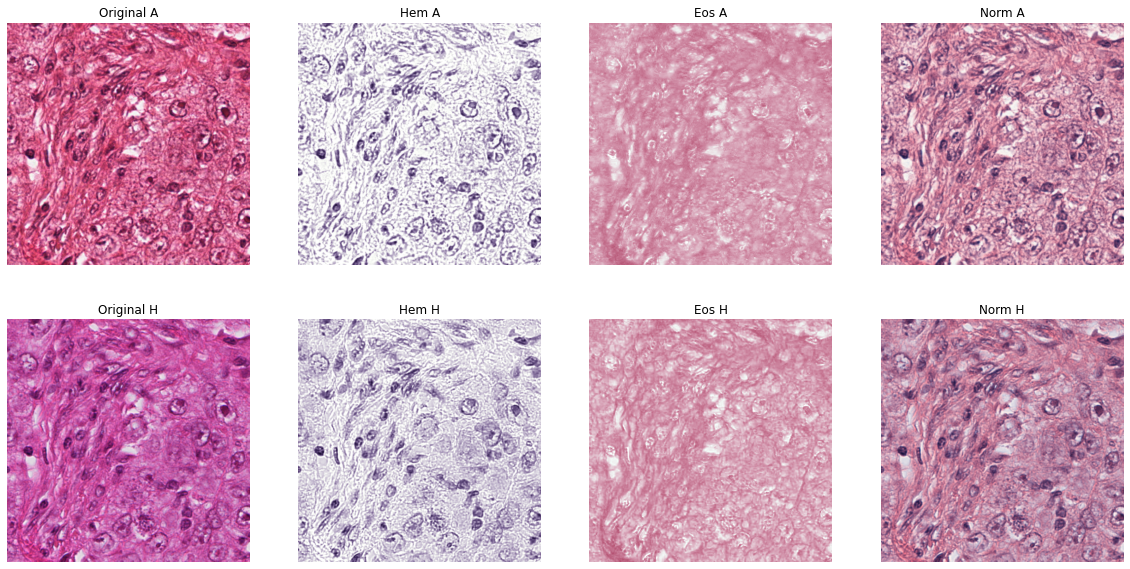

In [7]:
im_A = imread("./data/A00_01.bmp")
im_H = resize(imread("./data/H00_01.bmp"), im_A.shape, preserve_range=True)

hec_A = rgb2hec(im_A)
norm_A = hec2norm(hec_A)
h_A, e_A = hec2unmixed(hec_A)
hec_H = rgb2hec(im_H)
norm_H = hec2norm(hec_H)
h_H, e_H = hec2unmixed(hec_H)

plt.figure(figsize=(20,10))
plt.subplot(2, 4, 1)
plt.imshow(im_A[500:1000, 500:1000])
plt.title('Original A')
plt.axis('off')
plt.subplot(2, 4, 2)
plt.imshow(h_A[500:1000, 500:1000])
plt.title('Hem A')
plt.axis('off')
plt.subplot(2, 4, 3)
plt.imshow(e_A[500:1000, 500:1000])
plt.title('Eos A')
plt.axis('off')
plt.subplot(2, 4, 4)
plt.imshow(norm_A[500:1000, 500:1000])
plt.title('Norm A')
plt.axis('off')
plt.subplot(2, 4, 5)
plt.imshow(im_H[500:1000, 500:1000].astype('uint8'))
plt.title('Original H')
plt.axis('off')
plt.subplot(2, 4, 6)
plt.imshow(h_H[500:1000, 500:1000])
plt.title('Hem H')
plt.axis('off')
plt.subplot(2, 4, 7)
plt.imshow(e_H[500:1000, 500:1000])
plt.title('Eos H')
plt.axis('off')
plt.subplot(2, 4, 8)
plt.imshow(norm_H[500:1000, 500:1000])
plt.title('Norm H')
plt.axis('off')
plt.show()

Basic transformations for data augmentation on an image from the GlaS 2015 challenge, using the [transform](https://scikit-image.org/docs/stable/api/skimage.transform.html) module from scikit-image:

* Rescaling
* Rotation
* Flip

In [10]:
import skimage
print(skimage.__version__)

0.18.1


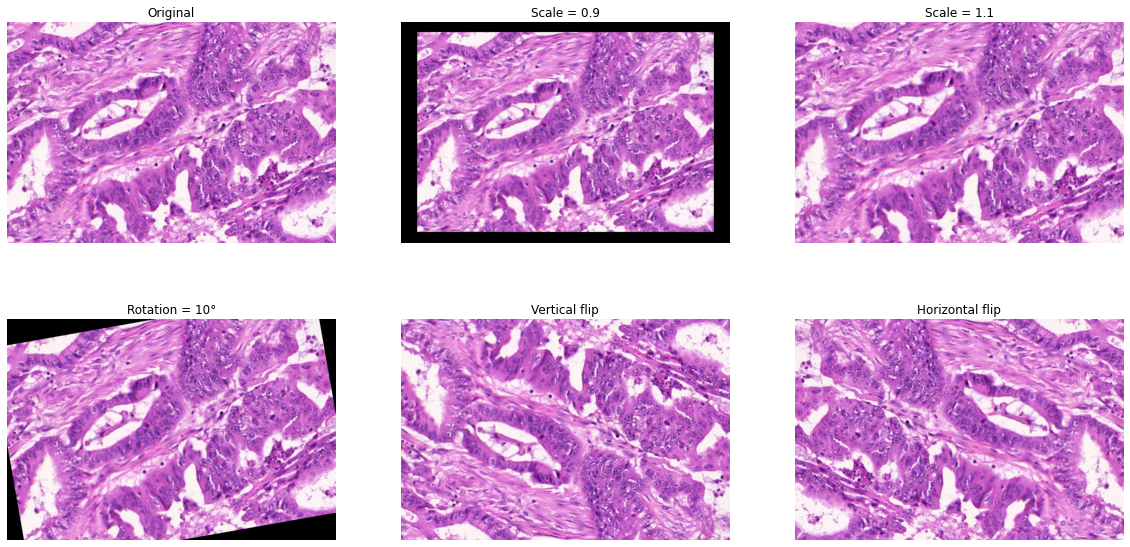

In [12]:
from skimage import transform as skt
from skimage import util as sku

im = imread('./data/glas_image.bmp')

im_r = skt.rescale(im, 0.9)
pad = (im.shape[0]-im_r.shape[0], im.shape[1]-im_r.shape[1])
im_r_padded = skt.resize(np.pad(im_r, [(pad[0]//2, pad[0]//2), (pad[1]//2, pad[1]//2), (0, 0)]), im.shape)
im_r2 = skt.rescale(im, 1.1)
crop = (im_r2.shape[0]-im.shape[0], im_r2.shape[1]-im.shape[1])
im_r2_cropped = sku.crop(im_r2, [(crop[0]//2, crop[0]//2), (crop[1]//2, crop[1]//2), (0, 0)])
im_rot = skt.rotate(im, 10)
im_flip_v = im[::-1]
im_flip_h = im[:,::-1]

plt.figure(figsize=(20,10))
plt.subplot(2, 3, 1)
plt.imshow(im)
plt.title('Original')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(im_r_padded)
plt.title('Scale = 0.9')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(im_r2_cropped)
plt.title('Scale = 1.1')
plt.axis('off')
plt.subplot(2, 3, 4)
plt.imshow(im_rot)
plt.title('Rotation = 10°')
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(im_flip_v)
plt.title('Vertical flip')
plt.axis('off')
plt.subplot(2, 3, 6)
plt.imshow(im_flip_h)
plt.title('Horizontal flip')
plt.axis('off')
plt.savefig('data_augmentation.png')
plt.show()

Random colour augmentation:

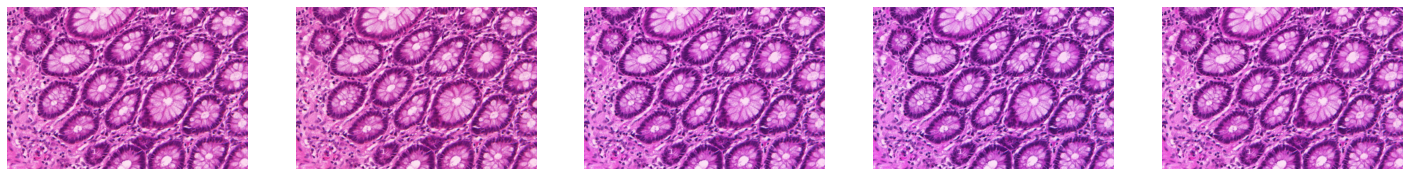

In [13]:
from skimage.color import rgb2hsv, hsv2rgb

im = imread('./data/glas_image_2.bmp')

plt.figure(figsize=(25,5))
plt.subplot(1, 5, 1)
plt.imshow(im)
plt.axis('off')
for i in range(4):
    hsv = rgb2hsv(im)
    h2 = hsv[..., 0] + (np.random.random()-0.5)/10
    hsv[..., 0] = h2
    rgb2 = hsv2rgb(hsv)
    plt.subplot(1, 5, i+2)
    plt.imshow(rgb2)
    plt.axis('off')
plt.show()